In [80]:
!pip install tensorflow

In [81]:
!pip install scikit-plot

In [82]:
import pandas as pd #  Imports the pandas library, a powerful library for data manipulation and analysis, and aliases it as pd.
import numpy as np # Imports the numpy library, a library for numerical operations and working with arrays, and aliases it as np.
import scikitplot #  Imports the scikit-plot library, a library for creating visualizations related to machine learning.
import random #  Imports the random module, which contains various functions for generating random numbers.
import seaborn as sns # Imports the seaborn library, a library for creating statistical graphics, and aliases it as sns.
import keras # Imports the Keras library, a high-level neural networks API built on top of TensorFlow.
import os #  Imports the os module, which provides a way to interact with the operating system.
from matplotlib import pyplot # Imports the pyplot module from the matplotlib library, which is used for creating plots and charts.
import matplotlib.pyplot as plt #  Imports the pyplot module from the matplotlib library and aliases it as plt.
import tensorflow as tf # Imports the TensorFlow library, a popular library for machine learning and deep learning, and aliases it as tf.
from tensorflow.keras.utils import to_categorical #  Imports the to_categorical function from TensorFlow's Keras utils, which is used to convert integer labels to one-hot vectors.

import warnings #  Imports the warnings module, which allows handling and filtering of warning messages.
from tensorflow.keras.models import Sequential # Imports the Sequential class from TensorFlow's Keras models, which is a linear stack of layers for building neural networks.

from keras.callbacks import EarlyStopping # Imports the EarlyStopping class from Keras callbacks, which can be used to stop training when a monitored quantity has stopped improving.

from keras import regularizers # Imports the regularizers module from Keras, which includes regularization functions like L1 and L2.
from keras.callbacks import ModelCheckpoint,EarlyStopping # Imports the ModelCheckpoint and EarlyStopping classes from Keras callbacks.
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax # Imports various optimization algorithms from TensorFlow's Keras optimizers, including Adam, RMSprop, Stochastic Gradient Descent (SGD), and Adamax.

from keras.preprocessing.image import ImageDataGenerator,load_img # Imports the ImageDataGenerator and load_img functions from Keras' image preprocessing module, which are used for data augmentation and loading images.

from keras.utils import plot_model #  Imports the plot_model function from Keras' visualization utilities, which is used to plot a neural network model.

from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input # Imports various layer types from Keras' layers module, which are used to build neural networks.

from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model selection module, which is used to split a dataset into training and testing sets.

from sklearn.preprocessing import StandardScaler # Imports the StandardScaler class from scikit-learn's preprocessing module, which is used to standardize features by removing the mean and scaling to unit variance.

warnings.simplefilter("ignore") # Sets the warnings filter to "ignore", which means that no warning messages will be displayed during the execution of the script.

from keras.models import Model #  Imports the Model class from Keras models, which is a base class for Keras models and can be used to create more complex neural network architectures.

from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model selection module, which is used to split a dataset into training and testing sets.

from sklearn.metrics import accuracy_score # Imports the accuracy_score function from scikit-learn's metrics module, which is used to compute the accuracy of a classifier's predictions.

from keras.regularizers import l1, l2 # Imports the L1 and L2 regularization functions from Keras' regularizers module, which can be used to apply penalties to the weights of a neural network during training to reduce overfitting.

import plotly.express as px # Imports the Plotly Express library, a high-level interface for creating interactive plots and charts, and aliases it as px.

from matplotlib import pyplot as plt # Imports the pyplot module from the matplotlib library and aliases it as plt, which is used for creating plots and charts.

from sklearn.metrics import confusion_matrix #  Imports the confusion_matrix function from scikit-learn's metrics module, which is used to compute the confusion matrix of a classifier's predictions.

from sklearn.metrics import classification_report # Imports the classification_report function from scikit-learn's metrics module, which is used to generate a text report showing the main classification metrics like precision, recall, and F1-score.

In [83]:
#load data

data = pd.read_csv("fer2013_changed.csv")
data.shape

(35887, 3)

In [84]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [85]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
3,0,123 125 124 142 209 226 234 236 231 232 235 22...,Training
4,0,8 9 14 21 26 32 37 46 52 62 72 70 71 73 76 83 ...,Training


In [86]:
data['emotion'].value_counts()

2    12991
4     6198
3     6077
0     5500
1     5121
Name: emotion, dtype: int64

In [87]:
# Data preprocessing

CLASS_LABELS = ['Anger','Fear','Happy','Sadness', 'Neutral']

fig = px.bar(
    x = CLASS_LABELS,
    y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])],

    color = np.unique(data['emotion']),
    color_continuous_scale = "Emrld")

fig.update_xaxes(title = "Emotion")
fig.update_yaxes(title = "Number of Image")
fig.update_layout(showlegend = True,

                  title = {
                      'text': 'Train Data Distribution',
                      'y': 0.95,
                      'x': 0.5,
                      'xanchor':'center',
                      'yanchor':'top'

                  }
                 )

fig.show()

In [88]:
data = data.sample(frac = 1) # permanently shuffling the data

In [89]:
# one hot encoding
labels = to_categorical(data[['emotion']], num_classes = 5)

In [90]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels) #converting pixel values to 8-bit unsigned integers

In [91]:
# standardization
pixels = train_pixels.reshape((35887*2304,1)) #reshaping the numpy array

In [92]:
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

In [93]:
# reshaping
pixels = train_pixels.reshape((35887, 48, 48, 1)) #reshaping into 48 * 48

In [94]:
# train test validataion

X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size =0.1, shuffle = False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, shuffle = False)


In [95]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


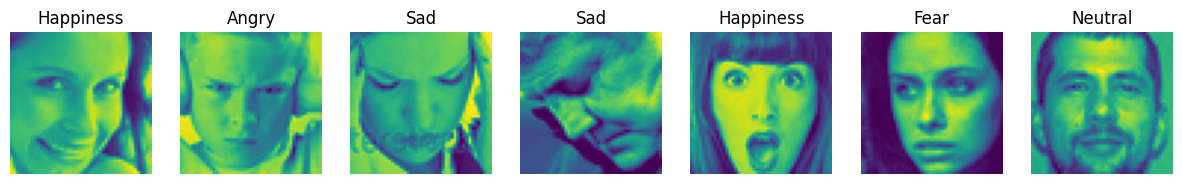

In [96]:
plt.figure(figsize = (15,23))
label_dict = {0 : 'Angry', 1 : 'Fear', 2 : 'Happiness', 3 : 'Sad', 4 : 'Neutral'}

i = 1
for i in range(7):
    img = np.squeeze(X_train[i])

    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])

    plt.axis('off')
    i += 1
plt.show()

In [97]:
# Data augmentation

datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = 0.2
)

valgen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [98]:
datagen.fit(X_train)
valgen.fit(X_val)

In [99]:
train_generator = datagen.flow(X_train, y_train, batch_size = 64)

val_generator = datagen.flow(X_val, y_val, batch_size = 64)

# Design A Model

In [100]:
def cnn_model():

  model= tf.keras.models.Sequential() # Creates a new Sequential model object.
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1))) # Adds a 2D convolutional layer with 32 filters, a 3x3 kernel size, "same" padding, ReLU activation function, and an input shape of (48, 48, 1) for grayscale images.

  model.add(Conv2D(64,(3,3), padding='same', activation='relu' )) #  Adds another 2D convolutional layer with 64 filters, a 3x3 kernel size, "same" padding, and ReLU activation function.

  model.add(BatchNormalization()) # Adds a batch normalization layer to normalize the activations of the previous layer.
  model.add(MaxPool2D(pool_size=(2, 2))) # Adds a 2D max-pooling layer with a pool size of 2x2 to reduce the spatial dimensions of the input.
  model.add(Dropout(0.25)) # Adds a dropout layer with a rate of 0.25 to prevent overfitting by randomly setting a fraction of input units to 0 during training.

  '''
  The next four blocks of layers follow a similar pattern with varying numbers of filters, kernel sizes, and regularization:

    Conv2D layer
    BatchNormalization layer
    MaxPool2D layer
    Dropout layer
  '''

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())  # A flatten layer to convert the 3D output of the previous layer into a 1D array.
  model.add(Dense(256,activation = 'relu')) # A fully connected dense layer with 256 units and a ReLU activation function.
  model.add(BatchNormalization()) # Another batch normalization layer.
  model.add(Dropout(0.25)) #  Another dropout layer with a rate of 0.25.

  model.add(Dense(512,activation = 'relu')) #Another fully connected dense layer with 512 units and a ReLU activation function.
  model.add(BatchNormalization()) # Another batch normalization layer.
  model.add(Dropout(0.25)) #  Another dropout layer with a rate of 0.25.

  model.add(Dense(5, activation='softmax')) # The output layer of the model, which is a fully connected dense layer with 5 units (corresponding to the 5 emotion classes) and a softmax activation function.

  # Lastly, the model is compiled using the Adam optimizer with a learning rate of 0.0001, categorical crossentropy loss, and the accuracy metric:
  model.compile(
    optimizer = Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
  return model # The function returns the compiled model, which can then be trained and evaluated using the training, validation, and test datasets.

'''
The cnn_model() function defines a convolutional neural network (CNN) model for emotion recognition using TensorFlow and Keras. The function creates a Sequential model and adds several layers to it, including convolutional, batch normalization, max-pooling, dropout, and dense layers. Finally, it compiles the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric. Here's a breakdown of each layer and its purpose:
'''

"\nThe cnn_model() function defines a convolutional neural network (CNN) model for emotion recognition using TensorFlow and Keras. The function creates a Sequential model and adds several layers to it, including convolutional, batch normalization, max-pooling, dropout, and dense layers. Finally, it compiles the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric. Here's a breakdown of each layer and its purpose:\n"

In [101]:
model = cnn_model()

In [102]:
model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_14 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)      

In [104]:
# early stopping

checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights = True,
                             mode = "max",patience = 5),

               ModelCheckpoint('AML/best_model.h5', monitor = "val_accuracy", verbose = 1,
                               save_best_only = True, mode = "max")
               ]


In [105]:
history = model.fit(train_generator,
                   epochs = 30,
                   batch_size = 64,
                   verbose = 1,
                   callbacks = [checkpointer],
                   validation_data = val_generator)

Epoch 1/30
455/455 [==============================] - ETA: 0s - loss: 6.3161 - accuracy: 0.2919
Epoch 1: val_accuracy improved from -inf to 0.35697, saving model to AML/best_model.h5
455/455 [==============================] - 520s 1s/step - loss: 6.3161 - accuracy: 0.2919 - val_loss: 2.2121 - val_accuracy: 0.3570
Epoch 2/30
455/455 [==============================] - ETA: 0s - loss: 1.9816 - accuracy: 0.3330
Epoch 2: val_accuracy did not improve from 0.35697
455/455 [==============================] - 562s 1s/step - loss: 1.9816 - accuracy: 0.3330 - val_loss: 1.9789 - val_accuracy: 0.3467
Epoch 3/30
455/455 [==============================] - ETA: 0s - loss: 1.9326 - accuracy: 0.3484
Epoch 3: val_accuracy improved from 0.35697 to 0.35728, saving model to AML/best_model.h5
455/455 [==============================] - 539s 1s/step - loss: 1.9326 - accuracy: 0.3484 - val_loss: 1.9706 - val_accuracy: 0.3573
Epoch 4/30
455/455 [==============================] - ETA: 0s - loss: 1.9418 - accuracy:

In [106]:
model.save('AML_model_firsttrain.h5')

In [129]:
import pickle

# save the model as a pickle file
model_pkl_file = "CNN_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

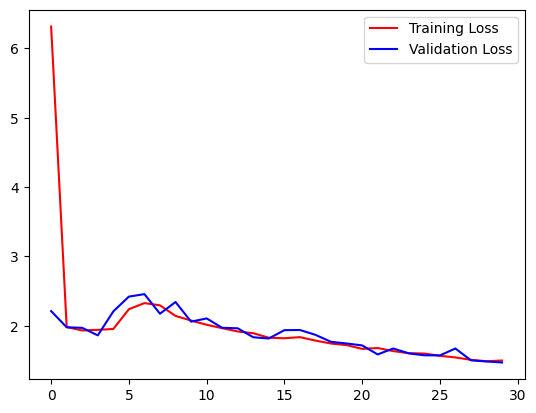

In [107]:
# visualizing

plt.plot(history.history["loss"],'r',label = "Training Loss")

plt.plot(history.history["val_loss"],'b', label = "Validation Loss")

plt.legend()

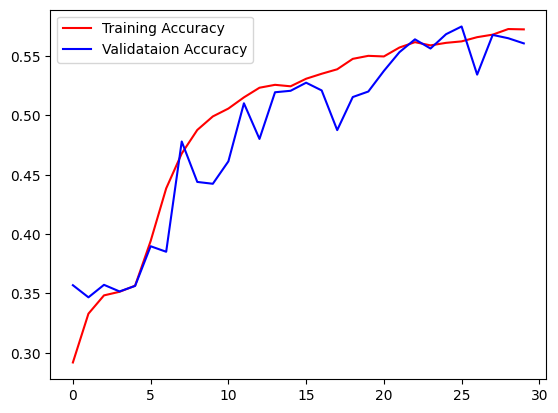

In [108]:
plt.plot(history.history["accuracy"],'r',label = "Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label = "Validataion Accuracy")
plt.legend()

In [109]:
loss = model.evaluate(X_test, y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 19s 163ms/step - loss: 1.4123 - accuracy: 0.5929
Test Acc: 0.5929228067398071


In [110]:
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis = 1)

113/113 [==============================] - 17s 146ms/step


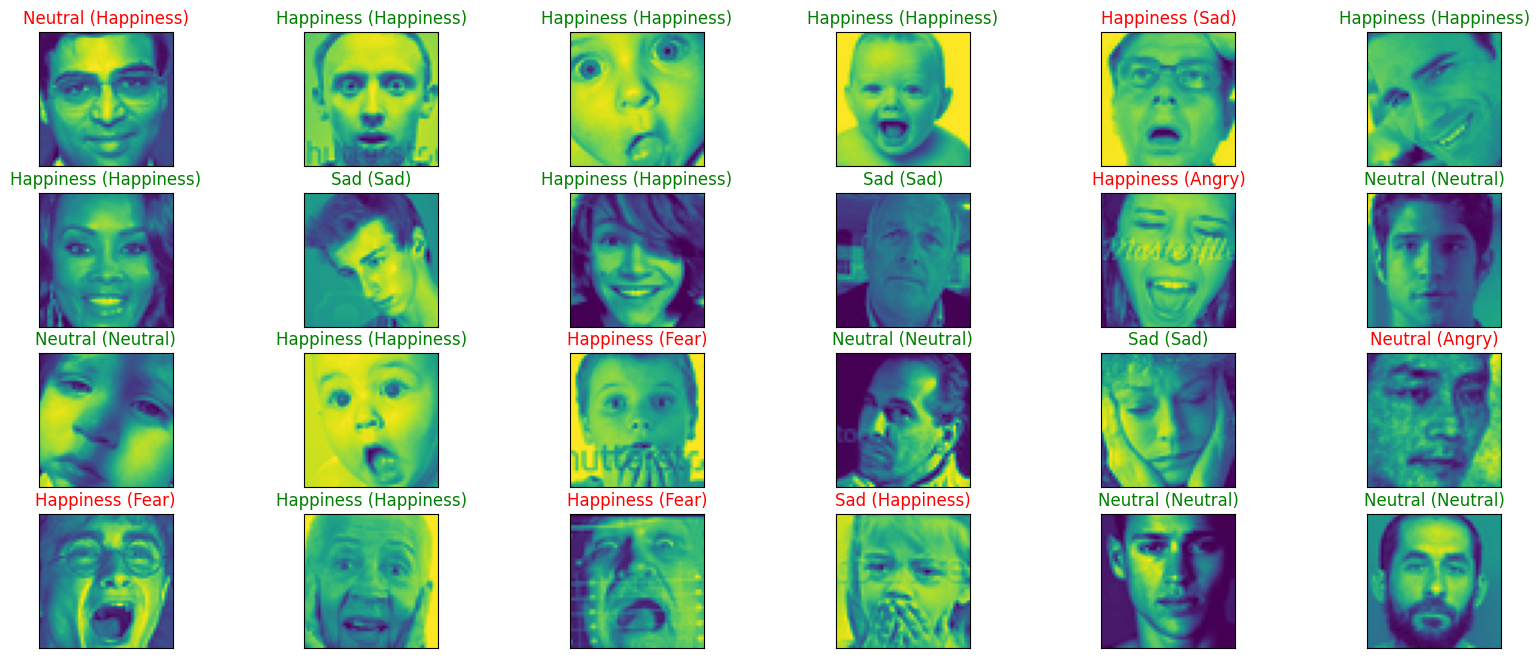

In [111]:
label_dict = {0 : 'Angry', 1 : 'Fear', 2 : 'Happiness', 3 : 'Sad', 4 : 'Neutral'} # label_dict: a Python dictionary that maps the integer label indices (0-6) to their corresponding string labels.

figure = plt.figure(figsize=(20, 8)) # figure: the matplotlib figure object that will be used to display the images and labels., plt.figure(figsize=(20, 8)): this creates a new figure object with a specified size of 20 x 8 inches.

for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)): # i: the index of the current subplot in the figure., index: a randomly selected index from the test set used to display an example image and its predicted and true labels. np.random.choice(X_test.shape[0], size=24, replace=False): this randomly selects 24 indices from the test set without replacement.
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]) # ax: the matplotlib Axes object representing the current subplot in the figure.figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]): this adds a new subplot to the figure, with 4 rows and 6 columns of subplots. The i + 1 argument specifies the index of the current subplot in the figure, and xticks=[] and yticks=[] remove the tick marks on the x and y axes.

    ax.imshow(np.squeeze(X_test[index])) # ax.imshow(): this displays the image on the subplot. np.squeeze(X_test[index]): this removes any single-dimensional entries from the shape of X_test[index] to ensure that the image is displayed properly.

    predict_index = label_dict[(y_pred[index])] # the predicted label for the current example image, obtained by mapping the predicted label index y_pred[index] to its corresponding string label using the label_dict dictionary.

    true_index = label_dict[np.argmax(y_test,axis=1)[index]] # true_index: the true label for the current example image, obtained by finding the index of the maximum value in the ground truth label y_test[index], and then mapping that index to its corresponding string label using the label_dict dictionary.


    '''
    ax.set_title(): this adds a title to the subplot.
    "{} ({})".format((predict_index), (true_index)): the title string that will be displayed on the subplot, which includes the predicted and true labels for the current example image.
    '''
    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red")) # the color of the title text, which is green if the predicted and true labels are the same, and red otherwise.

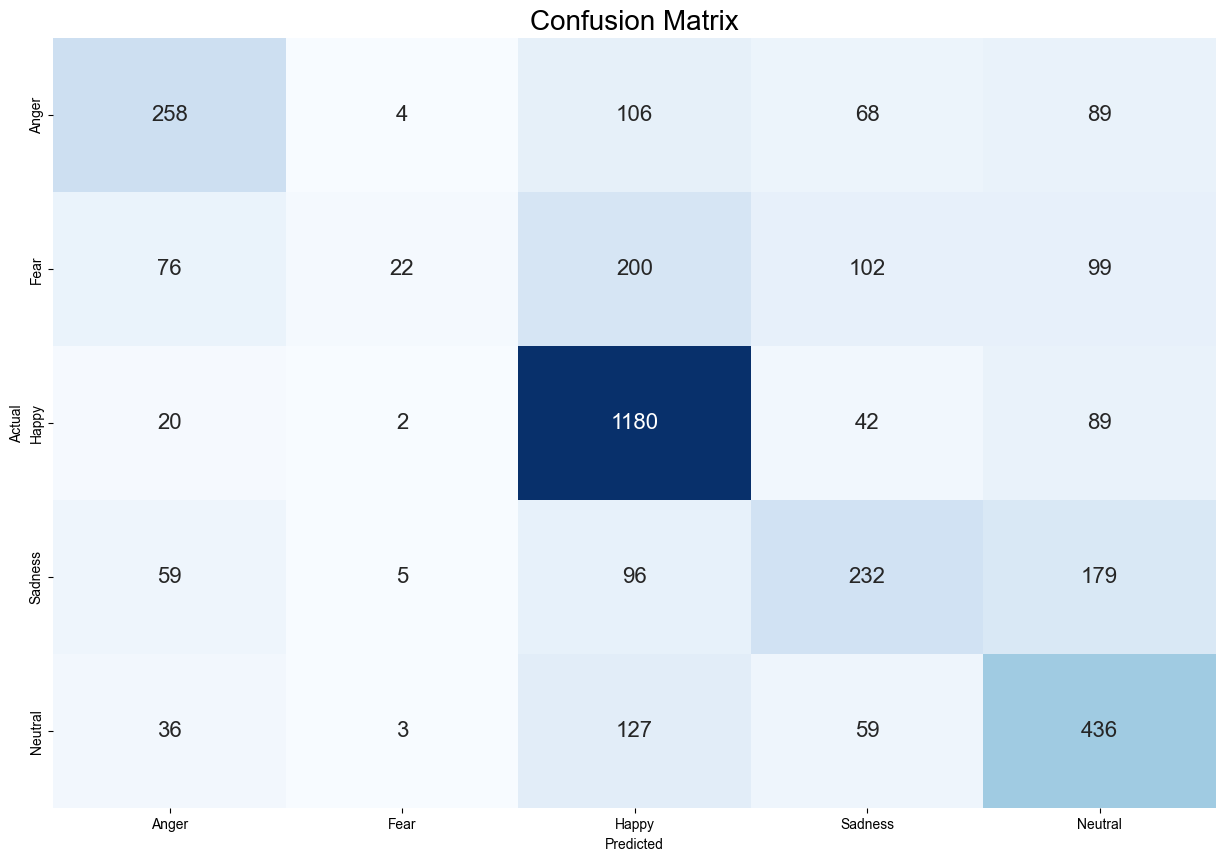

In [112]:
CLASS_LABELS  = ['Anger','Fear','Happy','Sadness', 'Neutral']

cm_data = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)

cm = pd.DataFrame(cm_data, columns = CLASS_LABELS, index= CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

plt.figure(figsize = (15,10))

plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale = 1.2)

ax = sns.heatmap(cm, cbar = False, cmap = "Blues", annot = True, annot_kws = {"size":16}, fmt = 'g')

In [113]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis = 1), y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.575     0.491     0.530       525
           1      0.611     0.044     0.082       499
           2      0.690     0.885     0.776      1333
           3      0.461     0.406     0.432       571
           4      0.489     0.660     0.561       661

    accuracy                          0.593      3589
   macro avg      0.565     0.497     0.476      3589
weighted avg      0.589     0.593     0.549      3589



In [114]:
# Fine Tuning
model = cnn_model()

In [115]:
model.compile(optimizer = tf.keras.optimizers.SGD(0.001), #increasing the learning rate to 0.001 from 0.0001
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [116]:
history = model.fit(train_generator, # a data generator that generates batches of training data during training. The data generator was created using the Keras ImageDataGenerator class, which generates augmented images in real-time as the model is training.
                    epochs=30, # the number of epochs (iterations over the entire training set) to train the model for. In this case, the model will be trained for 30 epochs.
                    batch_size=64,  #  the number of training examples to process at once during each training step. In this case, the batch size is set to 64.
                    verbose=1, # this specifies the level of detail to print during training. In this case, verbose=1 will print out progress updates during training for each epoch.
                    callbacks=[checkpointer], #  a list of callbacks to apply during training. In this case, the checkpointer callback is used to save the weights of the best performing model on the validation set.
                    validation_data=val_generator) # a data generator that generates batches of validation data during training. The validation data is used to monitor the model's performance on data that it has not seen during training.

'''
This code is training the compiled CNN model using the Keras fit method, which fits the model to the training data and returns a history object that contains information about the training process.
'''

Epoch 1/30
455/455 [==============================] - ETA: 0s - loss: 14.3756 - accuracy: 0.2272
Epoch 1: val_accuracy did not improve from 0.57492
455/455 [==============================] - 562s 1s/step - loss: 14.3756 - accuracy: 0.2272 - val_loss: 13.6734 - val_accuracy: 0.3080
Epoch 2/30
455/455 [==============================] - ETA: 0s - loss: 13.9710 - accuracy: 0.2399
Epoch 2: val_accuracy did not improve from 0.57492
455/455 [==============================] - 573s 1s/step - loss: 13.9710 - accuracy: 0.2399 - val_loss: 13.4509 - val_accuracy: 0.3226
Epoch 3/30
455/455 [==============================] - ETA: 0s - loss: 13.6550 - accuracy: 0.2529
Epoch 3: val_accuracy did not improve from 0.57492
455/455 [==============================] - 529s 1s/step - loss: 13.6550 - accuracy: 0.2529 - val_loss: 13.2337 - val_accuracy: 0.3427
Epoch 4/30
455/455 [==============================] - ETA: 0s - loss: 13.3847 - accuracy: 0.2598
Epoch 4: val_accuracy did not improve from 0.57492
455/45

'\nThis code is training the compiled CNN model using the Keras fit method, which fits the model to the training data and returns a history object that contains information about the training process.\n'

In [117]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: "+ str(loss[1]))

113/113 [==============================] - 15s 128ms/step - loss: 8.6051 - accuracy: 0.3831
Test Acc: 0.38311508297920227


In [118]:
# model.save('AML_model_2.h5')

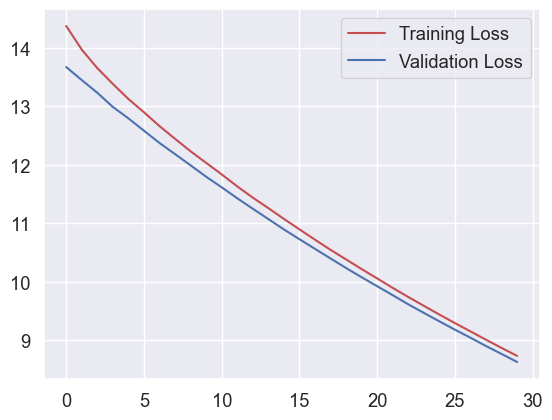

In [119]:
plt.plot(history.history["loss"],'r',label = "Training Loss")
plt.plot(history.history["val_loss"],'b',label = "Validation Loss")
plt.legend()

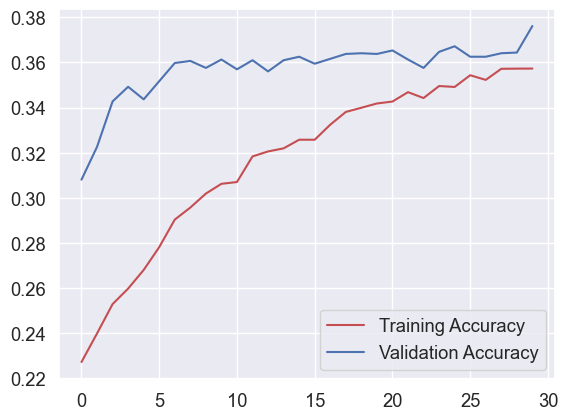

In [120]:
plt.plot(history.history["accuracy"],'r',label = "Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label = "Validation Accuracy")
plt.legend()

In [121]:
#changing epoch numbers

model = cnn_model()

In [122]:
model.compile( # the CNN model instance that was created using cnn_model().
    optimizer = Adam(lr=0.0001),  #  the optimizer to use during training. In this case, Adam is used with a learning rate of 0.0001. The optimizer is responsible for updating the model parameters during training in order to minimize the loss function.
    loss='categorical_crossentropy',  # the loss function to use during training. In this case, categorical cross-entropy is used, which is a common loss function used for multi-class classification problems.
    metrics=['accuracy']) #  the evaluation metric(s) to use during training and testing. In this case, only accuracy is used as the metric, which is a measure of the model's ability to correctly classify input examples. During training, the model will be optimized to maximize accuracy, and during testing, the accuracy will be reported to evaluate the model's performance on the test set.

In [123]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy',
                             verbose = 1,
                             restore_best_weights = True,
                             mode = "max",
                             patience = 10), #increased to 10

                ModelCheckpoint('best_model.h5',
                              monitor = "val_accuracy",
                              verbose = 1,
                              save_best_only = True,
                              mode = "max")

               ]

In [124]:
history = model.fit(train_generator,
                   epochs = 50, #increased no of epochs to 50
                   batch_size = 64,
                   verbose = 1,
                   callbacks = [checkpointer],
                   validation_data = val_generator)

Epoch 1/50
455/455 [==============================] - ETA: 0s - loss: 6.3861 - accuracy: 0.2892
Epoch 1: val_accuracy improved from -inf to 0.35697, saving model to best_model.h5
455/455 [==============================] - 469s 1s/step - loss: 6.3861 - accuracy: 0.2892 - val_loss: 2.1638 - val_accuracy: 0.3570
Epoch 2/50
455/455 [==============================] - ETA: 0s - loss: 2.0001 - accuracy: 0.3302
Epoch 2: val_accuracy did not improve from 0.35697
455/455 [==============================] - 463s 1s/step - loss: 2.0001 - accuracy: 0.3302 - val_loss: 1.8346 - val_accuracy: 0.3529
Epoch 3/50
455/455 [==============================] - ETA: 0s - loss: 1.9446 - accuracy: 0.3480
Epoch 3: val_accuracy did not improve from 0.35697
455/455 [==============================] - 465s 1s/step - loss: 1.9446 - accuracy: 0.3480 - val_loss: 2.0868 - val_accuracy: 0.3350
Epoch 4/50
455/455 [==============================] - ETA: 0s - loss: 1.9142 - accuracy: 0.3587
Epoch 4: val_accuracy improved from

In [125]:
loss = model.evaluate(X_test,y_test)
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 15s 130ms/step - loss: 1.3842 - accuracy: 0.5918
Test Acc: 0.5918083190917969


In [126]:
model.save('AML_model_3.h5')

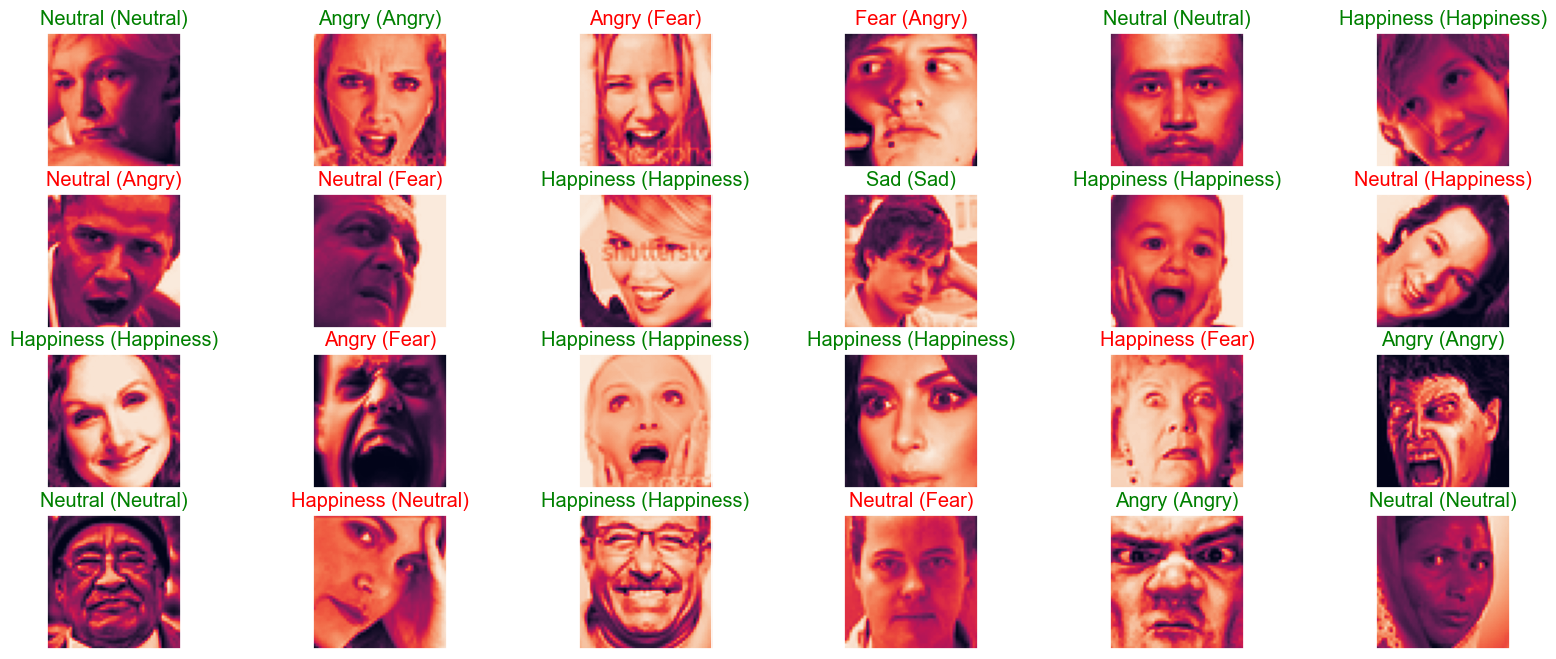

In [127]:
label_dict = {0 : 'Angry', 1 : 'Fear', 2 : 'Happiness', 3 : 'Sad', 4 : 'Neutral'} # label_dict: a Python dictionary that maps the integer label indices (0-6) to their corresponding string labels.

figure = plt.figure(figsize=(20, 8)) # figure: the matplotlib figure object that will be used to display the images and labels., plt.figure(figsize=(20, 8)): this creates a new figure object with a specified size of 20 x 8 inches.

for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)): # i: the index of the current subplot in the figure., index: a randomly selected index from the test set used to display an example image and its predicted and true labels. np.random.choice(X_test.shape[0], size=24, replace=False): this randomly selects 24 indices from the test set without replacement.
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]) # ax: the matplotlib Axes object representing the current subplot in the figure.figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]): this adds a new subplot to the figure, with 4 rows and 6 columns of subplots. The i + 1 argument specifies the index of the current subplot in the figure, and xticks=[] and yticks=[] remove the tick marks on the x and y axes.

    ax.imshow(np.squeeze(X_test[index])) # ax.imshow(): this displays the image on the subplot. np.squeeze(X_test[index]): this removes any single-dimensional entries from the shape of X_test[index] to ensure that the image is displayed properly.

    predict_index = label_dict[(y_pred[index])] # the predicted label for the current example image, obtained by mapping the predicted label index y_pred[index] to its corresponding string label using the label_dict dictionary.

    true_index = label_dict[np.argmax(y_test,axis=1)[index]] # true_index: the true label for the current example image, obtained by finding the index of the maximum value in the ground truth label y_test[index], and then mapping that index to its corresponding string label using the label_dict dictionary.


    '''
    ax.set_title(): this adds a title to the subplot.
    "{} ({})".format((predict_index), (true_index)): the title string that will be displayed on the subplot, which includes the predicted and true labels for the current example image.
    '''
    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red")) # the color of the title text, which is green if the predicted and true labels are the same, and red otherwise.

In [128]:
model.save('AML_model_4.h5')